# DATA 200 | Group Assignment On Data Exploration

Working on sensor dataset

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)


### Loading the dataset

In [2]:
# load each csv files
csv_files = ["part1.csv", "part2.csv", "part3.csv", "part4.csv", "part5.csv"]

# combine the csv files into a single dataframe
dataframes = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dataframes, ignore_index = True)


### Understanding the dataset

#### Step 1: Basic Information

In [3]:
# Shape of the dataset
df.shape

(999999, 13)

In [4]:
# Since the dataset has 13 columns, let's display the name of columns
df.columns

Index(['factory_id', 'tag_type_code', 'battery_replace_date', 'display_name',
       'wdt_state_id', 'sensor_value', 'voltage', 'battery_capacity',
       'base_capacity', 'wakeup_counter', 'firmware_version', 'read_date',
       'render_counter'],
      dtype='object')

In [5]:
print("\n*** Dataset Information ***\n")
print(df.info())
print("\n*** First 5 rows ***\n")
print(df.head())


*** Dataset Information ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   factory_id            999999 non-null  int64  
 1   tag_type_code         999999 non-null  int64  
 2   battery_replace_date  999999 non-null  object 
 3   display_name          999999 non-null  object 
 4   wdt_state_id          999999 non-null  int64  
 5   sensor_value          999999 non-null  int64  
 6   voltage               999999 non-null  float64
 7   battery_capacity      999999 non-null  float64
 8   base_capacity         999999 non-null  float64
 9   wakeup_counter        999999 non-null  int64  
 10  firmware_version      999999 non-null  int64  
 11  read_date             999999 non-null  object 
 12  render_counter        999999 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 99.2+ MB
None

*** First 

##### As evident from the output above, pandas has decided for the three columns viz battery_replace_date, display_name and read_date as object. But the column name suggest it to be a datetime datatype. So let's convert it to datetime datatype.

In [ ]:
# There is issue with the fractional seconds (for example, the read_date has values like 12:01:49.823)
# so we will use regex to to ensure the format is consistent.
# Normalize the fractional seconds to a consistent format
df['read_date'] = df['read_date'].str.replace(r'\.\d+$', '', regex=True)
df['battery_replace_date'] = df['battery_replace_date'].str.replace(r'\.\d+$', '', regex=True)



In [ ]:
# Once the two columns are in consistent format, we are ready to convert them into datetime format.

df['battery_replace_date'] = pd.to_datetime(df['battery_replace_date'])
df['read_date'] = pd.to_datetime(df['read_date'])

In [ ]:
# Now we will check for the datatypes once again
df.dtypes

factory_id                       int64
tag_type_code                    int64
battery_replace_date    datetime64[ns]
display_name                    object
wdt_state_id                     int64
sensor_value                     int64
voltage                        float64
battery_capacity               float64
base_capacity                  float64
wakeup_counter                   int64
firmware_version                 int64
read_date               datetime64[ns]
render_counter                   int64
dtype: object

In [ ]:
#  Let's look at the Statiscal Summary for all the numeric columns
df.describe()

,factory_id,tag_type_code,battery_replace_date,wdt_state_id,sensor_value,voltage,battery_capacity,base_capacity,wakeup_counter,firmware_version,read_date,render_counter
count,9.999990e+05,999999.0,999999,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,9.999990e+05,9.999990e+05,999999,9.999990e+05
mean,7.255882e+07,208.0,2018-03-31 12:43:29.292191488,2.510876,181.211208,2.966106,65.802486,65.802486,1.838457e+06,2.047854e+05,2019-09-12 15:11:52.733511168,3.506749e+05
min,1.966080e+05,208.0,2007-12-26 00:00:00,1.000000,64.000000,1.020400,0.000000,0.000000,7.000000e+00,0.000000e+00,2018-06-12 12:01:08,0.000000e+00
25%,7.255256e+07,208.0,2018-03-26 01:00:00,3.000000,181.000000,2.962600,52.400000,52.400000,6.932805e+05,2.600000e+01,2019-02-07 12:00:53,9.000000e+00
50%,7.255719e+07,208.0,2018-03-27 01:00:00,3.000000,182.000000,2.979200,67.500000,67.500000,1.353894e+06,2.600000e+01,2019-08-23 12:03:01,1.600000e+01
75%,7.261795e+07,208.0,2018-05-16 01:00:00,3.000000,183.000000,2.995800,80.600000,80.600000,2.133284e+06,2.600000e+01,2020-04-09 12:00:51,3.000000e+01
max,7.263848e+07,208.0,2135-05-16 01:00:00,3.000000,255.000000,4.191000,2474.600000,2474.600000,4.294967e+09,1.515871e+09,2021-02-04 12:09:04,4.294967e+09
std,1.890091e+05,0.0,NaN,0.859655,4.751103,0.078868,18.354133,18.354133,3.515101e+07,1.704827e+07,NaN,3.774996e+07


#### From above it is evident that the tag_type_code has only 1 value through out the columns. Let us confirm by getting the number of unique values in this row. We will also confirm about the 3rd column namely "display_name" that pandas identifiead as object.\

In [27]:
# Count of unique values
tag_type_code_count = df['tag_type_code'].nunique()
display_name_count = df['display_name'].nunique()

print(f"Number of unique tag_type_code values: {tag_type_code_count}")
print(f"Number of unique display_name values: {display_name_count}")

Number of unique tag_type_code values: 1
Number of unique display_name values: 1


#### So since these two columns won't contribute to analysis since they lack variablility let's drop them

In [29]:
# Drop columns with single unique values
columns_to_drop = ['tag_type_code', 'display_name']
df = df.drop(columns=columns_to_drop)

# Confirm removal
print("Updated columns:", df.columns)


Updated columns: Index(['factory_id', 'battery_replace_date', 'wdt_state_id', 'sensor_value',
       'voltage', 'battery_capacity', 'base_capacity', 'wakeup_counter',
       'firmware_version', 'read_date', 'render_counter'],
      dtype='object')


In [ ]:
# Let's check for any missing value in the dataset
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 factory_id              0
battery_replace_date    0
wdt_state_id            0
sensor_value            0
voltage                 0
battery_capacity        0
base_capacity           0
wakeup_counter          0
firmware_version        0
read_date               0
render_counter          0
dtype: int64


In [ ]:
# Check for any duplicate value
duplicates = df.duplicated()
print(f"\nNumber of Duplicate Rows: {duplicates.sum()}")


Number of Duplicate Rows: 0


In [34]:
df.isna().sum()

factory_id              0
battery_replace_date    0
wdt_state_id            0
sensor_value            0
voltage                 0
battery_capacity        0
base_capacity           0
wakeup_counter          0
firmware_version        0
read_date               0
render_counter          0
dtype: int64

### Step 2:

<Axes: >

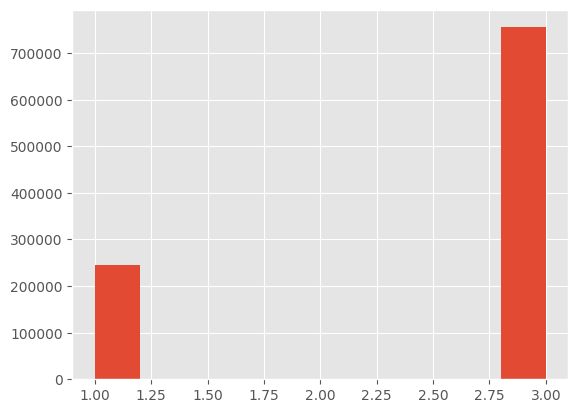

In [56]:
df['wdt_state_id'].hist()

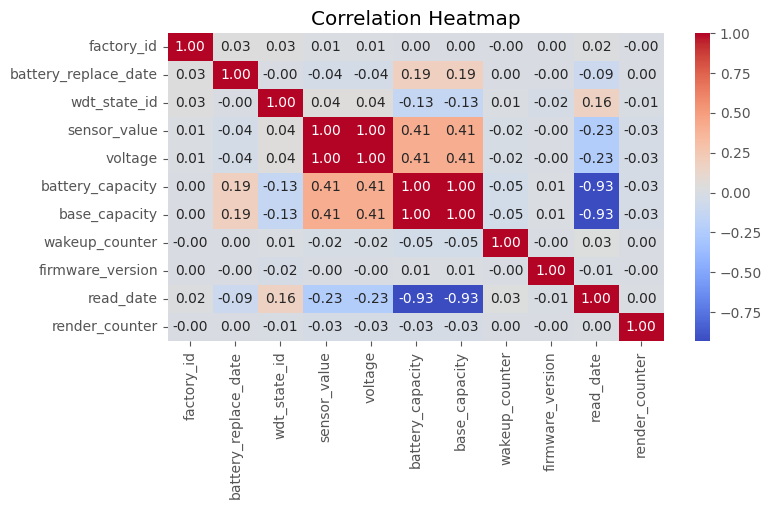

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize= (8,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

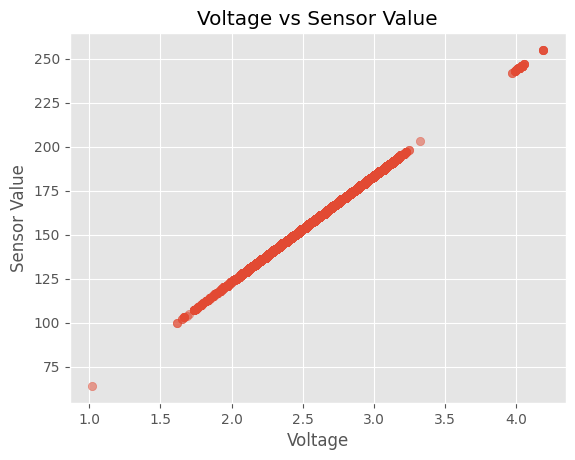

In [80]:
plt.scatter(df['voltage'], df['sensor_value'], alpha=0.5)
plt.title('Voltage vs Sensor Value')
plt.xlabel('Voltage')
plt.ylabel('Sensor Value')
plt.show()


In [ ]:
# Make sure read_date is datetime datatype
df['read_date'] = pd.to_datetime(df['read_date'])


In [69]:
data_sample = df.sample(10000, random_state=42)  # Adjust sample size as needed


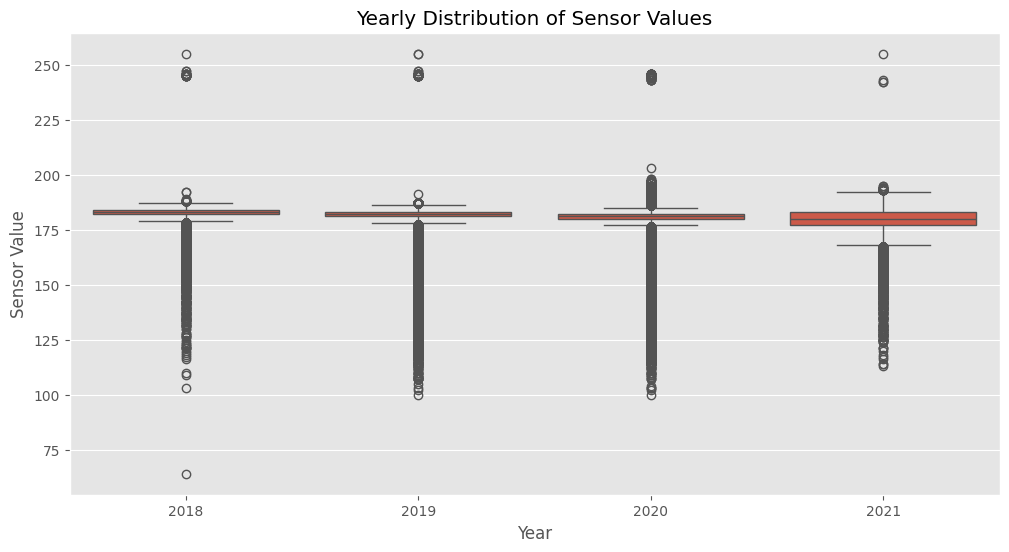

In [81]:
df['year'] = df['read_date'].dt.year
df['month'] = df['read_date'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='sensor_value')
plt.title("Yearly Distribution of Sensor Values")
plt.xlabel("Year")
plt.ylabel("Sensor Value")
plt.show()


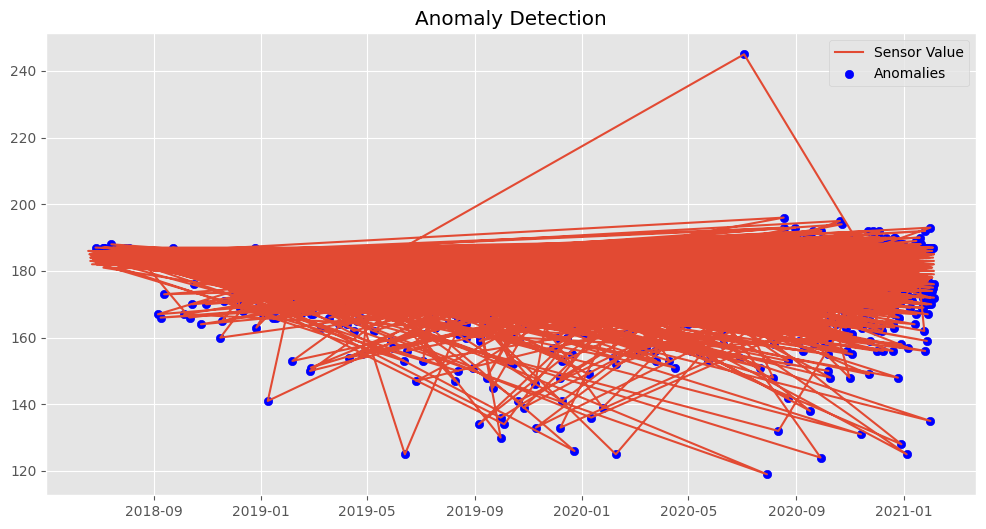

In [84]:
Q1 = data_sample['sensor_value'].quantile(0.25)
Q3 = data_sample['sensor_value'].quantile(0.75)
IQR = Q3 - Q1

anomalies = data_sample[(data_sample['sensor_value'] < Q1 - 1.5 * IQR) | (data_sample['sensor_value'] > Q3 + 1.5 * IQR)]

plt.figure(figsize=(12, 6))
plt.plot(data_sample['read_date'], data_sample['sensor_value'], label='Sensor Value')
plt.scatter(anomalies['read_date'], anomalies['sensor_value'], color='blue', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection")
plt.show()


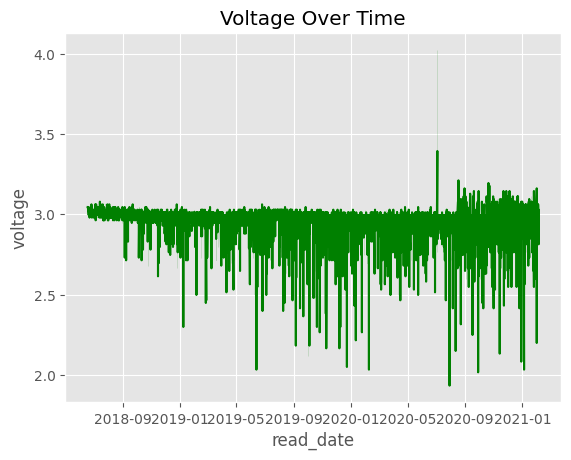

In [85]:
sns.lineplot(data=data_sample, x='read_date', y='voltage', color='green')
plt.title("Voltage Over Time")
plt.show()


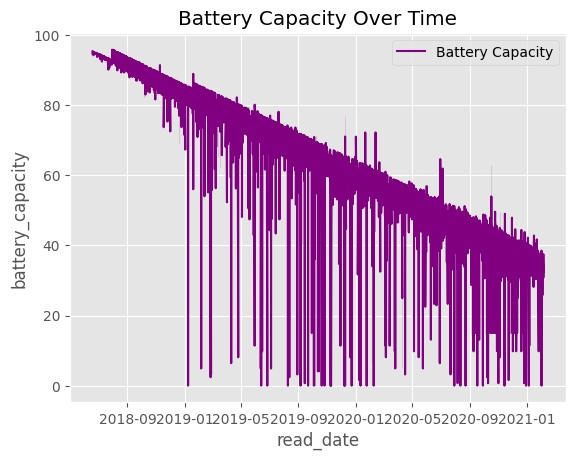

In [86]:
sns.lineplot(data=data_sample, x='read_date', y='battery_capacity', label="Battery Capacity", color='purple')
plt.title("Battery Capacity Over Time")
plt.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_26068\3998617357.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data_sample.resample('M', on='read_date').mean()


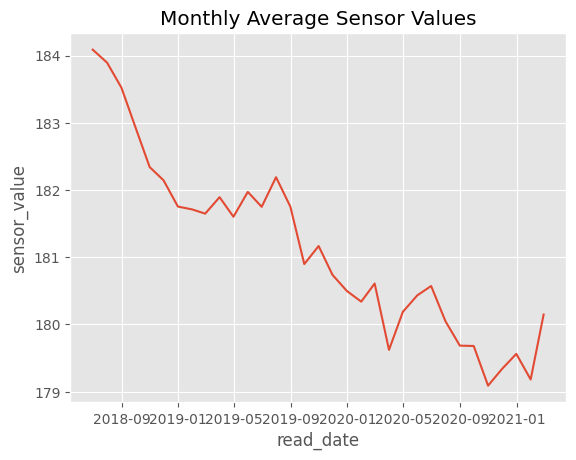

In [88]:
monthly_avg = data_sample.resample('M', on='read_date').mean()
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='sensor_value')
plt.title("Monthly Average Sensor Values")
plt.show()


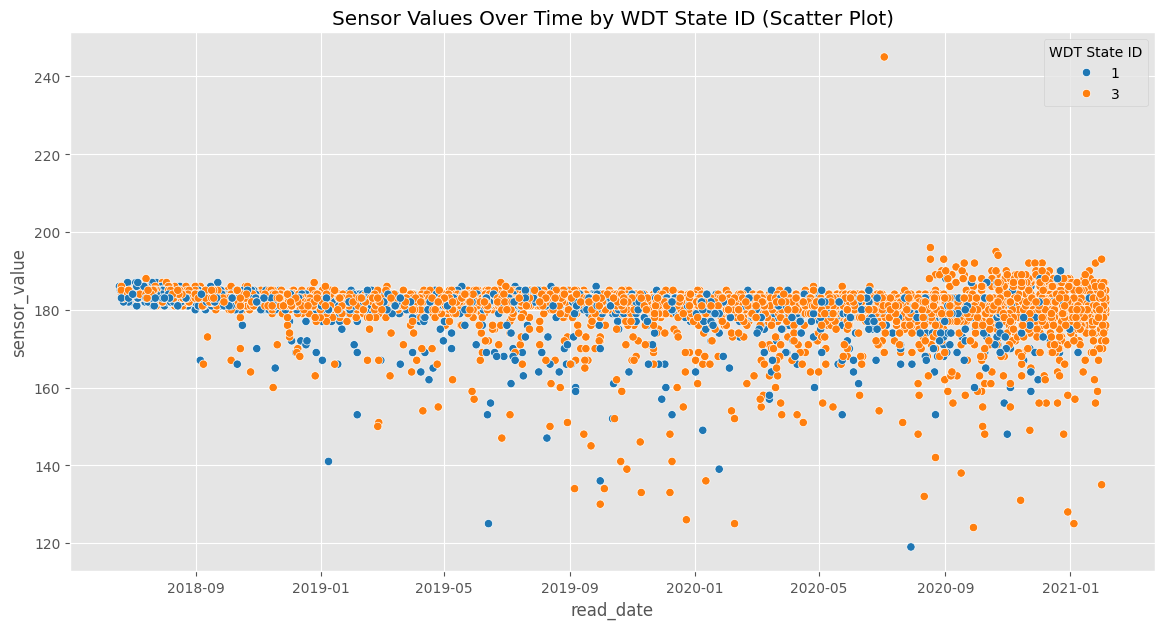

In [95]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data_sample, x='read_date', y='sensor_value', hue='wdt_state_id', palette='tab10')
plt.title("Sensor Values Over Time by WDT State ID (Scatter Plot)")
plt.legend(title="WDT State ID")
plt.show()


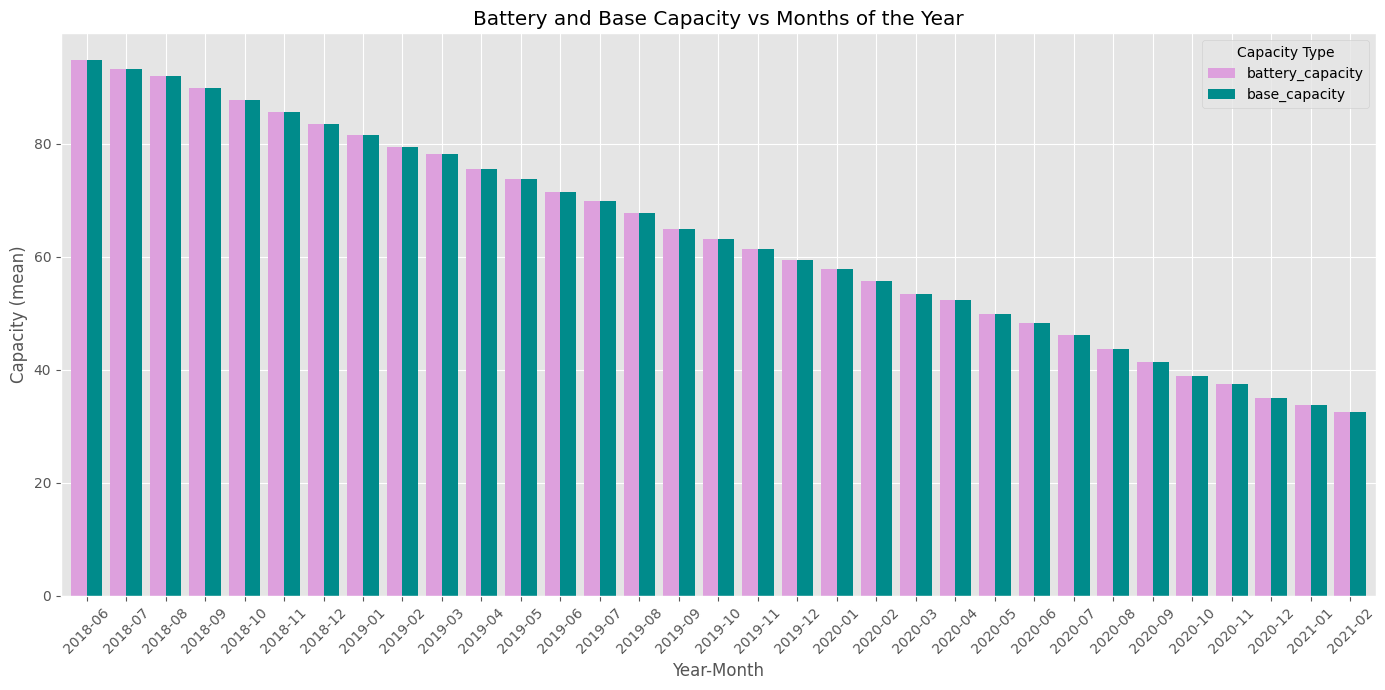

In [100]:
# Extract month and year from the read_date for aggregation
data_sample['year_month'] = data_sample['read_date'].dt.to_period('M')  # Create a year-month period

# Group by the year_month and calculate the mean for battery_capacity and base_capacity
monthly_capacity = data_sample.groupby('year_month')[['battery_capacity', 'base_capacity']].mean()

# Plot the bar graph for both capacities
plt.figure(figsize=(14, 7))
monthly_capacity.plot(kind='bar', width=0.8, color=['plum', 'darkcyan'], ax=plt.gca())
plt.title('Battery and Base Capacity vs Months of the Year')
plt.xlabel('Year-Month')
plt.ylabel('Capacity (mean)')
plt.xticks(rotation=45)
plt.legend(title="Capacity Type")
plt.tight_layout()
plt.show()


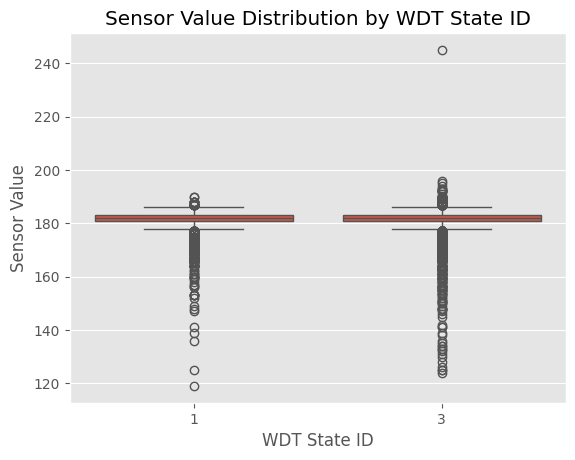

In [106]:
sns.boxplot(x='wdt_state_id', y='sensor_value', data=data_sample)
plt.title('Sensor Value Distribution by WDT State ID')
plt.xlabel('WDT State ID')
plt.ylabel('Sensor Value')
plt.show()



Problems encountered
-Unable to plot battery capacity across factories